In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')

import ccal

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['figure.max_open_warning'] = 200

HOME_DIR = os.environ['HOME']
CCLE_DIR = os.path.join(HOME_DIR, 'data', 'ccle')

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


<124218> Target 1 (750 cols) and features (645 cols) have 597 shared columns.
<124218> Dropping features with less than 2 unique values ...
<124218> 	Kept 481 features.
<124218> Changed n_features to be 100 to avoid computing CI for and plotting too many features.
<124218> Using already computed scores ...
<124218> 	Head:                   score  0.95 moe   p-value  fdr (forward)  fdr (reverse)  \
CBB-1007      -0.389493  0.047592  0.995613       0.995613       0.993462   
staurosporine -0.369067  0.082199  0.990499       0.992563       0.993462   
necrostatin-7 -0.364739  0.105541  0.988773       0.992563       0.993462   
ruxolitinib   -0.363203  0.042192  0.988191       0.992563       0.993462   
thalidomide   -0.360901  0.041476  0.987360       0.992563       0.993462   

                    fdr  
CBB-1007       0.993462  
staurosporine  0.992563  
necrostatin-7  0.992563  
ruxolitinib    0.992563  
thalidomide    0.992563  
<124218> 	Tail:                       score  0.95 moe   p

,score,0.95 moe,p-value,fdr (forward),fdr (reverse),fdr
CBB-1007,-0.389493,0.047592,0.995613,0.995613,0.993462,0.993462
staurosporine,-0.369067,0.082199,0.990499,0.992563,0.993462,0.992563
necrostatin-7,-0.364739,0.105541,0.988773,0.992563,0.993462,0.992563
ruxolitinib,-0.363203,0.042192,0.988191,0.992563,0.993462,0.992563
thalidomide,-0.360901,0.041476,0.987360,0.992563,0.993462,0.992563
birinapant,-0.358346,0.080337,0.986237,0.992563,0.993462,0.992563
dasatinib,-0.351973,0.015056,0.982703,0.992563,0.993462,0.992563
SGX-523,-0.351323,0.017502,0.982391,0.992563,0.993462,0.992563
GDC-0879,-0.338613,0.107750,0.974012,0.990486,0.993462,0.990486
XL765,-0.337448,0.120611,0.972994,0.990486,0.993462,0.990486


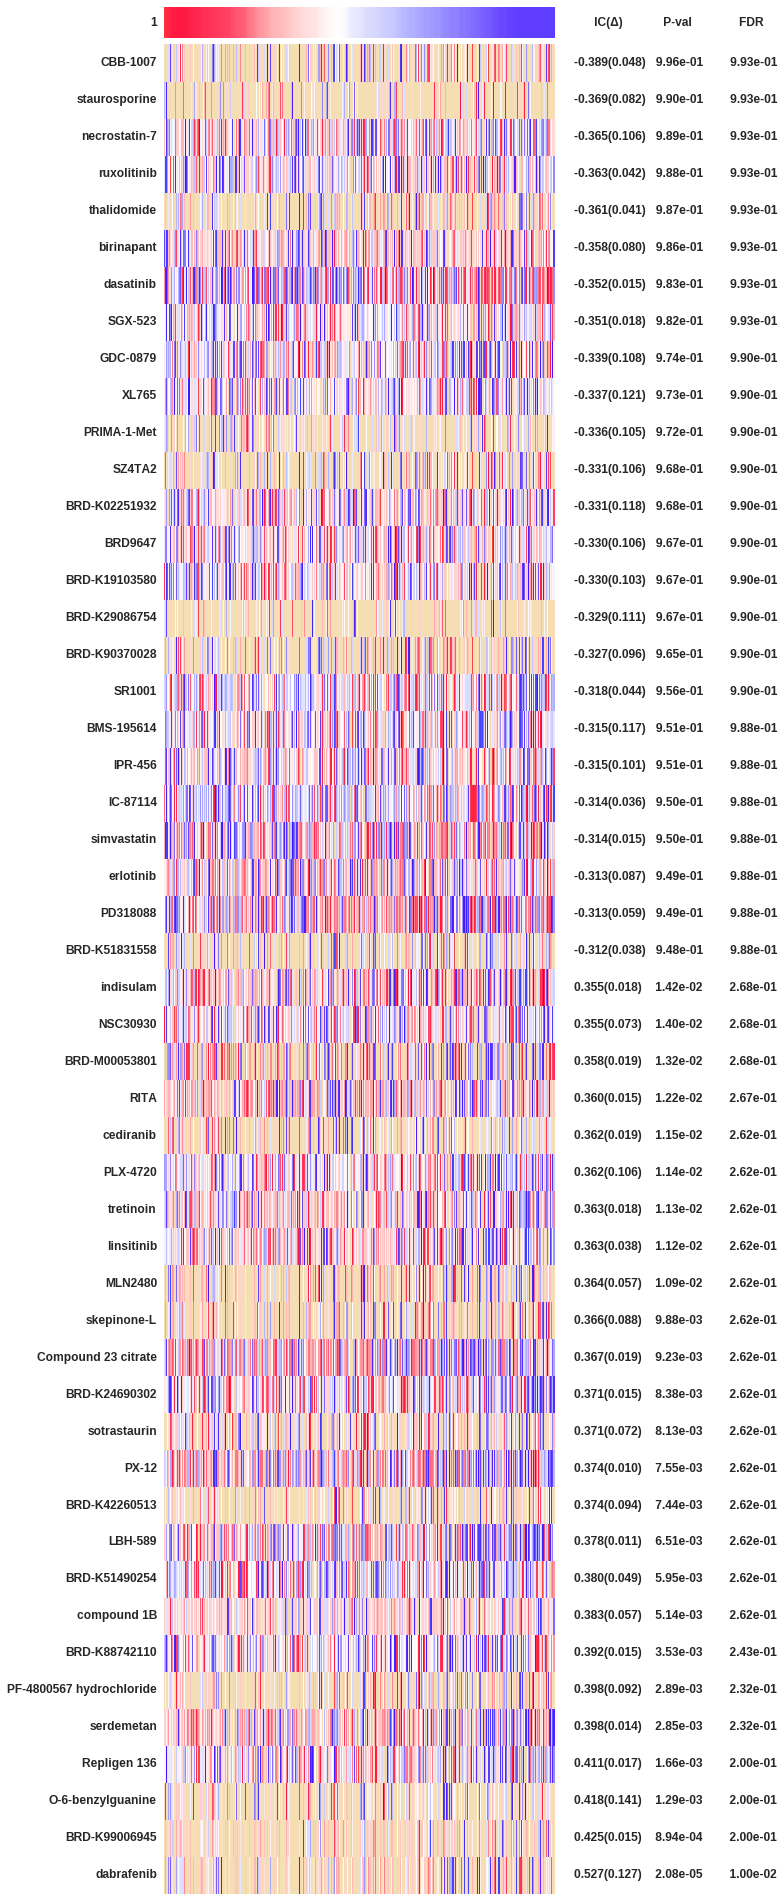

In [2]:
target = ccal.read_gct('data/nmf_k9_h.gct').ix[1, :]
features = ccal.read_gct('/home/cyborg/data/ccle/ccle_drug_sensitivity.gct')
ccal.make_association_panel(target, features, target_type='continuous', features_type='continuous', features_ascending=True,
                            n_jobs=1, n_samplings=0, n_permutations=0,
                            filepath_scores='/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/1_vs_drug_sensitivity.txt',
                            filepath_prefix='/home/cyborg/Desktop/x')

# Test plot_summary_association_panel

In [ ]:
# Target
component = 1
h_matrix = ccal.read_gct('data/nmf_k9_h.gct')
target = h_matrix.ix[component, :]

# Features
feature_indices = list(range(3))
pathway_expression_filepath = os.path.join(CCLE_DIR, 'ccle_pathway_expression.gct')
pathology_filepath = os.path.join(CCLE_DIR, 'ccle_pathology.gct')
phenotype_filepath = os.path.join(CCLE_DIR, 'ccle_phenotype.gct')
drug_sensitivity_filepath = os.path.join(CCLE_DIR, 'ccle_drug_sensitivity.gct')
feature_bundle = [
    ['Pathway Expression', pathway_expression_filepath, 'continuous', False, 0, feature_indices, []],
    ['Pathology',  pathology_filepath, 'binary', False, 0, [], []],
    ['Phenotype', phenotype_filepath, 'binary', False, 0, feature_indices, []],
    ['Drug Sensitivity', drug_sensitivity_filepath, 'continuous', True, 0, feature_indices, []]
]

# Annotations
annotation_bundle = [
    ['Pathway Expression', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/top20_pathway_expression.txt'],
    ['Pathology',  '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/top20_pathology.txt'],
    ['Phenotype', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/_phenotype.txt'],
    ['Drug Sensitivity', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/_drug_sensitivity.txt']
]

ccal.plot_summary_association_panel(target, feature_bundle, annotation_bundle, filepath='result/plot_summary_association_panel/test.pdf')

# Test make_association_panel

## Test speicfic call

In [ ]:
n_samples = 3000
n_features = 50

n_targert_categories = None
n_features_categories = None

if n_targert_categories:
    if n_targert_categories == 2:  # Test binary category
        target_type = 'binary'
    elif n_targert_categories > 2:  # Test categorical category
        target_type = 'categorical'
else:  # Test continuous target
    target_type = 'continuous'
    
if n_features_categories:
    if n_features_categories == 2:  # Test binary features
        features_type = 'binary'
    elif n_features_categories > 2:  # Test categorical features
        features_type = 'categorical'
else:  # Test continuous features
    features_type = 'continuous'

simulated_target = ccal.support.simulate_dataframe_or_series(1, n_samples,
                                                             n_categories=n_targert_categories)
simulated_features = ccal.support.simulate_dataframe_or_series(n_features, n_samples,
                                                             n_categories=n_features_categories)
n_samplings = 0
n_permutations = 0
S = ccal.make_association_panel(simulated_target, simulated_features,
                                target_type=target_type, features_type=features_type,
                                n_samplings=n_samplings, n_permutations=n_permutations,
                                filepath_prefix='result/make_association_panel/test')

## Test with loop

In [ ]:
ccal.support.VERBOSE = False

# Test continuous, categorical, and binary target
for n_targert_categories in [10, 2, None]:
    
    if n_targert_categories:
        if n_targert_categories == 2:  # Test binary category
            target_type = 'binary'
            
        elif n_targert_categories > 2:  # Test categorical category
            target_type = 'categorical'
            
    else:  # Test continuous target
        target_type = 'continuous'
        
    # Test continuous, categorical, and binary features
    for n_features_categories in [None, 10, 2]:
        
        if n_features_categories:
            if n_features_categories == 2:  # Test binary features
                features_type = 'binary'
                
            elif n_features_categories > 2:  # Test categorical features
                features_type = 'categorical'
                
        else:  # Test continuous features
            features_type = 'continuous'

        # Test with varying number of features
        for n_features in [1, 2, 50]:
            
            # Test with varying number of samples
            for n_samples in [3, 100]:

                # Simualte target
                simulated_target = ccal.support.simulate_dataframe_or_series(1,
                                                                             n_samples,
                                                                             n_categories=n_targert_categories)
                
                # Simulate features
                while True:
                    simulated_features = ccal.support.simulate_dataframe_or_series(n_features,
                                                                                   n_samples,
                                                                                   n_categories=n_features_categories)
                    if isinstance(simulated_features, pd.Series):
                        if len(set(simulated_features)) > 2:
                            break
                    else:
                        simulated_features = simulated_features.ix[simulated_features.apply(lambda f: len(set(f)), axis=1) >= 2]
                        if not simulated_features.empty:
                            break
                        
                # Test varying number of parallel jobs
                for n_jobs in [1]:
                    
                    # Test varying numbner of samplings
                    for n_samplings in [1, 3]: 

                        # Test varying number of permutations
                        for n_permutations in [1, 3]:

                            title = '{}X{} & {}X{} @ {}jobs & {}smpl & {}perms'.format(n_features,
                                                                                       n_samples,
                                                                                       target_type[:3],
                                                                                       features_type[:3],
                                                                                       n_jobs,
                                                                                       n_samplings,
                                                                                       n_permutations)
                            print(title)

                            # Test
                            ccal.make_association_panel(simulated_target, simulated_features,
                                                        target_type=target_type, features_type=features_type, 
                                                        n_samplings=n_samplings, n_permutations=n_permutations,
                                                        title=title,                                                   
                                                        filepath_prefix='result/make_association_panel/{}'.format(title))

# Read test data

In [ ]:
h_matrix = ccal.read_gct('data/nmf_k9_h.gct')

In [ ]:
variant_filepath = os.path.join(CCLE_DIR, 'ccle_variants.gct')
gene_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_gene_dependencies.gct')
gene_expression_filepath = os.path.join(CCLE_DIR, 'ccle_gene_expressions.gct')
pathway_expression_filepath = os.path.join(CCLE_DIR, 'ccle_pathway_expressions.gct')
protein_expression_filepath = os.path.join(CCLE_DIR, 'ccle_protein_expressions.gct')
pathology_filepath = os.path.join(CCLE_DIR, 'ccle_pathologies.gct')
phenotype_filepath = os.path.join(CCLE_DIR, 'ccle_phenotypes.gct')
drug_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_drug_sensitivities.gct')

variant_df = ccal.read_gct(variant_filepath)
gene_dependency_df = ccal.read_gct(gene_dependency_filepath)
gene_expression_df = ccal.read_gct(gene_expression_filepath)
pathway_expression_df = ccal.read_gct(pathway_expression_filepath)
protein_expression_df = ccal.read_gct(protein_expression_filepath)
pathology_df = ccal.read_gct(pathology_filepath)
phenotype_df = ccal.read_gct(phenotype_filepath)
drug_dependency_df = ccal.read_gct(drug_dependency_filepath)

# Test make_association_panels

## Make target bundle

In [ ]:
component = 9
target_bundle = [['H Matrix', h_matrix, 'continuous', False, 0, component, 'Component {}'.format(component)]]

## Make feature bundles

In [ ]:
feature_bundles = {}

n_features = 100
feature_indices = list(range(n_features))

feature_bundles['features=filepath'] = [['Variant', variant_filepath, 'binary', False, 0, feature_indices, []],
                                        ['Gene Dependency', gene_dependency_filepath, 'continuous', True, 0, feature_indices, []],
                                        ['Gene Expression', gene_expression_filepath, 'continuous', False, 0, feature_indices, []],
                                        ['Pathway Expression', pathway_expression_filepath, 'continuous', False, 0, feature_indices, []],
                                        ['Protein Expression', protein_expression_filepath, 'continuous', False, 0, feature_indices, []],
                                        ['Pathology',  pathology_filepath, 'binary', False, 0, [], []],
                                        ['Phenotype', phenotype_filepath, 'binary', False, 0, feature_indices, []],
                                        ['Drug Sensitivity', drug_dependency_filepath, 'continuous', True, 0, feature_indices, []]]

feature_bundles['features=df'] = [['Variant', variant_df, 'binary', False, 0, feature_indices, []],
                                  ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, feature_indices, []],
                                  ['Gene Expression', gene_expression_df, 'continuous', False, 0, feature_indices, []],
                                  ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, feature_indices, []],
                                  ['Protein Expression', protein_expression_df, 'continuous', False, 0, feature_indices, []],
                                  ['Pathology',  pathology_df, 'binary', False, 0, [], []],
                                  ['Phenotype', phenotype_df, 'binary', False, 0, feature_indices, []],
                                  ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, feature_indices, []]]

feature_aliases = ['Feature {}'.format(f) for f in feature_indices]
feature_bundles['feature_aliases'] = [['Variant', variant_df, 'binary', False, 0, feature_indices, feature_aliases],
                                      ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, feature_indices, feature_aliases],
                                      ['Gene Expression', gene_expression_df, 'continuous', False, 0, feature_indices, feature_aliases],
                                      ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, feature_indices, feature_aliases],
                                      ['Protein Expression', protein_expression_df, 'continuous', False, 0, feature_indices, feature_aliases],
                                      ['Pathology',  pathology_df, 'binary', False, 0, [], feature_aliases],
                                      ['Phenotype', phenotype_df, 'binary', False, 0, feature_indices, feature_aliases],
                                      ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, feature_indices, feature_aliases]]

## Test

In [ ]:
for feature_bundle_name, feature_bundle in feature_bundles.items():
    if 'filepath' not in feature_bundle_name:
        ccal.make_association_panels(target_bundle, feature_bundle,
                                     n_features=10, n_jobs=1, n_samplings=3, n_permutations=3,
                                     dpi=10,
                                     filepath_prefix='result/make_association_panels/{}_'.format(feature_bundle_name))